In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [80]:
df1=pd.read_csv(r'C:\Users\my computer\Documents\Data Science\Assignments\Simple Linear Regression\Salary_Data.csv')

In [81]:
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [83]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [84]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [85]:
df1.duplicated().sum()

0

In [86]:
scaler=StandardScaler()

In [87]:
scaled_df=scaler.fit_transform(df)
df=pd.DataFrame(scaled_df,columns=['X','Y'])
df

,X,Y
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [88]:
df.corr()

,X,Y
X,1.000000,0.978242
Y,0.978242,1.000000


<Axes: >

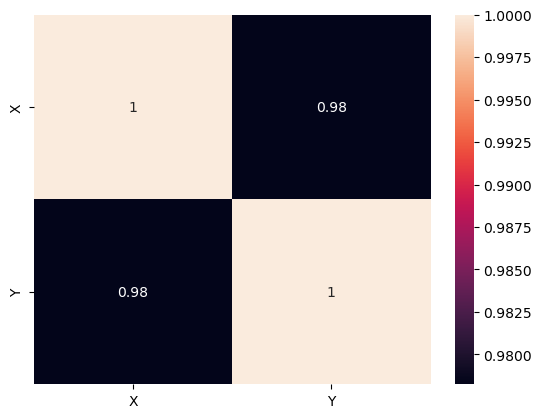

In [89]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='X', ylabel='Y'>

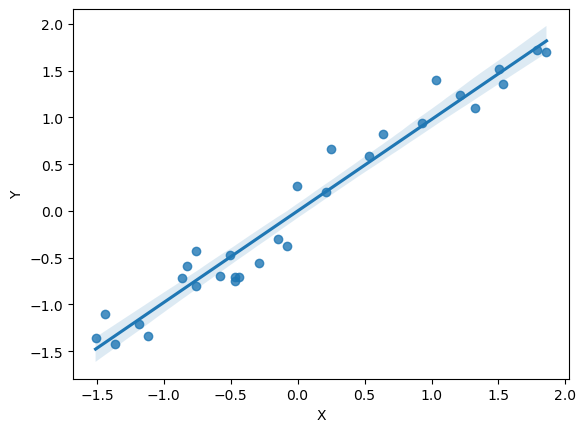

In [90]:
sns.regplot(x=df['X'],y=df['Y'])

Text(0.5, 1.0, 'Salary')

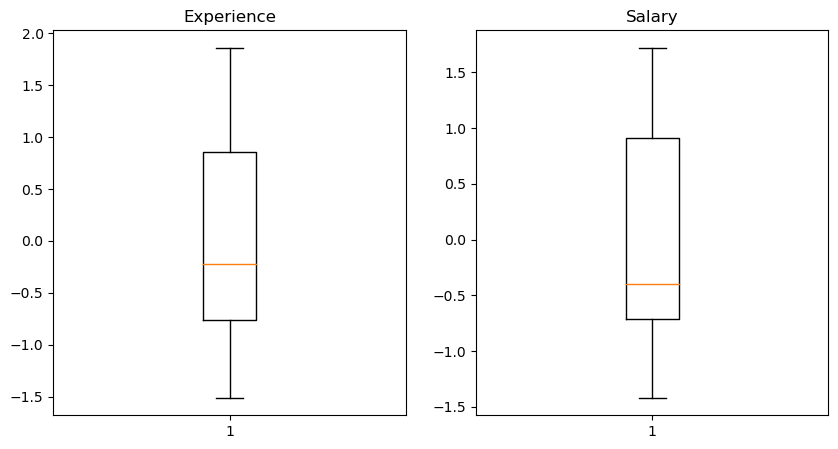

In [91]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['X'])
plt.title('Experience')
plt.subplot(1,2,2)
plt.boxplot(df['Y'])
plt.title('Salary')

Text(0.5, 1.0, 'Homoscedasticity')

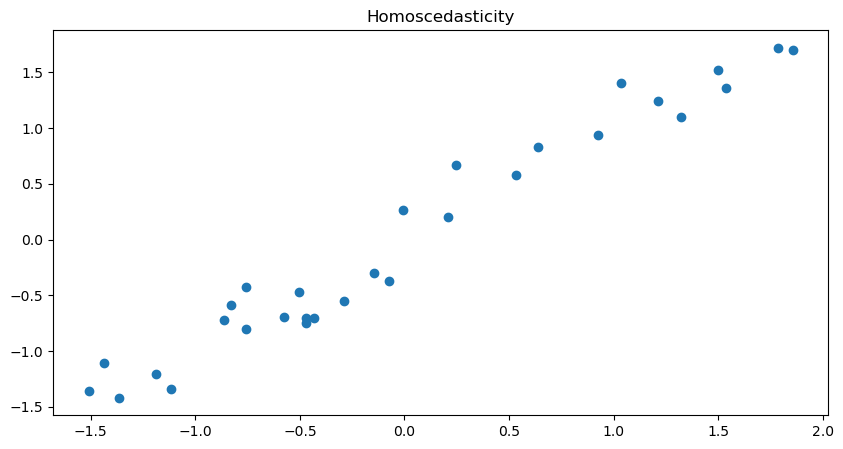

In [92]:
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['Y'])
plt.title('Homoscedasticity')

C:\Users\my computer\AppData\Local\Temp\ipykernel_15624\1226852307.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Y'])
C:\Users\my computer\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\my computer\AppData\Local\Temp\ipykernel_15624\1226852307.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updat

Text(0.5, 1.0, 'Cube Root Transformation')

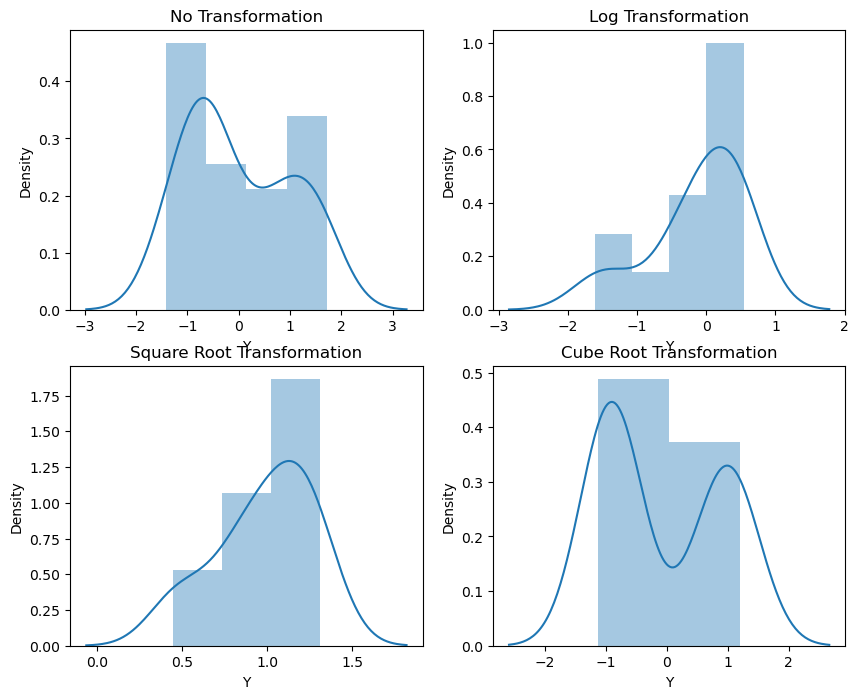

In [93]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(df['Y'])
plt.title('No Transformation')
plt.subplot(2,2,2)
sns.distplot(np.log(df['Y']))
plt.title('Log Transformation')
plt.subplot(2,2,3)
sns.distplot(np.sqrt(df['Y']))
plt.title('Square Root Transformation')
plt.subplot(2,2,4)
sns.distplot(np.cbrt(df['Y']))
plt.title('Cube Root Transformation')

In [102]:
X=df[['X']]
X

,X
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814
5,-0.864935
6,-0.829096
7,-0.757416
8,-0.757416
9,-0.578216


In [103]:
Y=df[['Y']]
Y

,Y
0,-1.360113
1,-1.105527
2,-1.419919
3,-1.204957
4,-1.339781
5,-0.718307
6,-0.588158
7,-0.799817
8,-0.428810
9,-0.698013


In [105]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80,random_state=5)

In [110]:
lin_model=LinearRegression()

#### No Transformation Model

In [108]:
m1=lin_model.fit(x_train,y_train)

In [117]:
m1.score(x_train,y_train)

0.9558669444454045

#### Cube Root Transformtion Model

In [120]:
m2=lin_model.fit(np.cbrt(x_train),np.cbrt(y_train))

In [121]:
m2.score(np.cbrt(x_train),np.cbrt(y_train))

0.9555237598940353

In [123]:
m1.predict(x_test)

array([[-0.4516074 ],
       [ 1.9239456 ],
       [ 1.08336531],
       [ 1.37574106],
       [ 0.24278501],
       [-0.48815437]])

In [124]:
m2.predict(np.cbrt(x_test))

array([[-0.76485325],
       [ 1.28220013],
       [ 1.05972599],
       [ 1.14734608],
       [ 0.63474599],
       [-0.78449557]])

In [127]:
rmse1=np.sqrt(mean_squared_error(y_test,m1.predict(x_test)))
rmse2=np.sqrt(mean_squared_error(y_test,m2.predict(np.cbrt(x_test))))

In [128]:
rmse1

0.23088763244682087

In [129]:
rmse2

0.31161425833896905

# No Transformation Model is the Best Model